<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Matrix Review

Estimated time needed: **45** minutes


Matrix operations are a fundamental part of machine learning and many fields, such as digital signal processing, optimization, control systems, computer graphics, and so on. As a result, there has been a lot of work on optimizing matrix operations, not only in software, but in hardware. Let's say you work for a AI hardware  company, the company has developed a new processor that can only perform matrix operations. The company needs you to implement some popular  statistics such as mean, variance and Principle Component Analysis using Matrix operations


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/technology-electronic-device-computer-hardware-computer-component-electronics-motherboard-personal-computer-hardware-cpu-computer-accessory-1536663.jpeg" width="500" alt="https://pxhere.com/en/photo/1536663">


## Table of Contents

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Basics of Matrices">Basics of Matrices</a>
        <ol>
            <li><a href="https://https://https://#What's a Matrix?">What's a Matrix? </a></li>
            <li><a href="https://https://https://#Rank of a Matrix">Rank of a Matrix </a></li>
            <li><a href="https://#Frobenius Norm of a Matrix">Frobenius Norm of a Matrix</a></li>
            <li><a href="https://#Matrix Additione"> Matrix Addition</a></li>
        </ol>
    </li>
  <li>
        <a href="https://https://#Matrix and Vector Multiplication">Matrix and Vector Multiplication</a>
        <ol>
            <li><a href="#What's a Matrix?"> Dot-Product </a></li>
            <li><a href="#Rank of a Matrix">The Outer product</a></li>
            <li><a href="#Matrix and Vector Multiplication">Matrix and Vector Multiplication</a></li>
            <li><a href="https://#Matrix Multiplication">Multiplying Matrices</a></li>
     </ol>
   </li>
   <li>
        <a href="https://#Eigen Decomposition">Eigen Decomposition</a>
        <ol>
            <li><a href="#What's a Matrix?"> Eigenvectors and Eigenvalues </a></li>
            <li><a href="#Rank of a Matrix">The Factorization for PCA</a></li>
        </ol>     
   </li>

 </ol>    


***


## Objectives

After completing this lab you will be able to:

*   **Understand** Basic Matrix operations such as Matrix addition, Vector Multiplication  Eigen decomposition

*   **Apply** Apply these Matrix operations using numpy


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas ==1.3.4 ..."


You can install and use  <a href="https://www.sympy.org/en/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01">SymPy </a> to print matrices


In [2]:
# !conda install -c anaconda sympy -y

### Importing required libraries


In [3]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np 
import matplotlib.pylab as plt

from sklearn.decomposition import PCA
from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv, norm
from scipy.linalg import null_space
init_printing()

### Defining Helper Functions

*Use this section to define any helper functions to help the notebook's code readability:*


In [4]:
def plot_2d(dict_):
    for key, value in dict_.items():
        if value.shape[0]>2:
            plt.scatter(value[:, 0], value[:, 1],label=key)
        else:
            print(value)
            plt.quiver([0],[0],value[:,0],value[:,1],label=key)

    plt.legend()
    plt.show()

## Basics of Matrices


### What's a Matrix


Numpy treats matrix objects as numpy arrays, so we will use Numpy to create matrices. Let's consider the square matrix A.


**NOTE**: We use the function `Matrix` to print out the Matrix , each column of matrix has two columns: Matrix $\mathbf{A}=[\mathbf{a}*{1},\mathbf{a}*{2}]$


In [5]:
A=np.array([[2,-3],[4,7]])

Matrix(A)

⎡2  -3⎤
⎢     ⎥
⎣4  7 ⎦

In [6]:
a1=A[:,0]
a1

array([2, 4])

In [7]:
a2=A[:,1]
a2

array([-3,  7])

Denoted by $A^{T}$, the transpose of a matrix  switches the row and column indices of the matrix, in numpy we can determine the transpose of $A$ as follows:


In [8]:
AT=A.T
Matrix(AT)

⎡2   4⎤
⎢     ⎥
⎣-3  7⎦

### Rank of a Matrix


The rank of a matrix is the number of dimension the rows of the matrix "live in".  You can verify the Matrix truly behaves like a  square matrix if it's <a href='https://en.wikipedia.org/wiki/Rank_(linear_algebra)?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01'>rank</a> is equal to the number of rows or columns, then it is referred to as **full rank**.


In [9]:
matrix_rank(A)

2

We can plot the columns of $A$ as vectors.


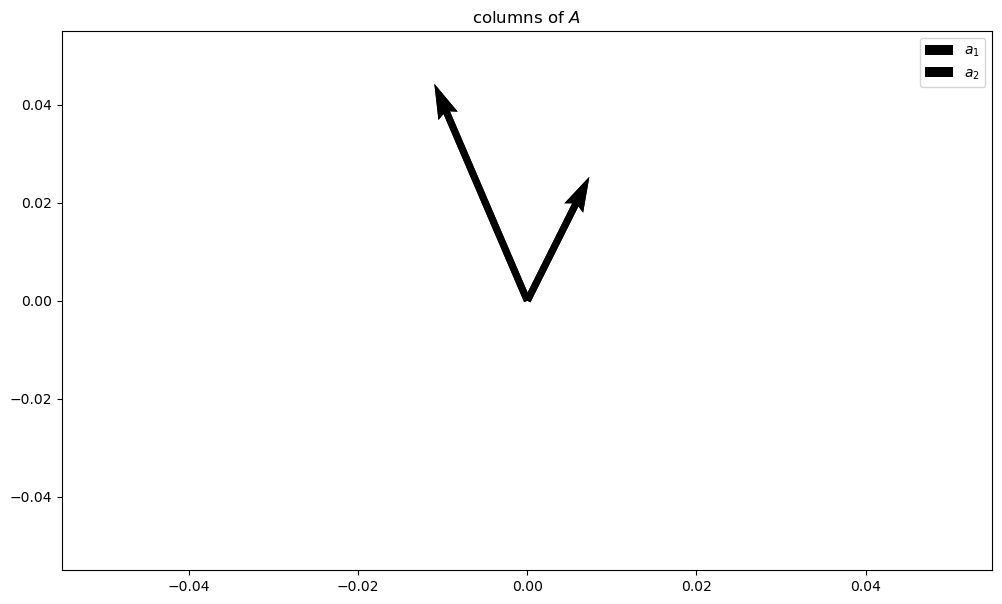

In [10]:
fig, ax = plt.subplots(figsize = (12, 7))

ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=30,label="$a_{1}$")
ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=30,label="$a_{2}$")
plt.title("columns of $A$ ")
plt.legend()
plt.show()

As the vectors are not parallel, we can define any point on the 2d space as a scaled  combination of those two vectors.

If any of the columns in a matrix  are multiples of each other, the vectors point in the same direction and the matrix is not full rank.


In [11]:
F=np.array([[2,4],[4,8]])
matrix_rank(F)

1

We see the columns are pointing  in the same direction


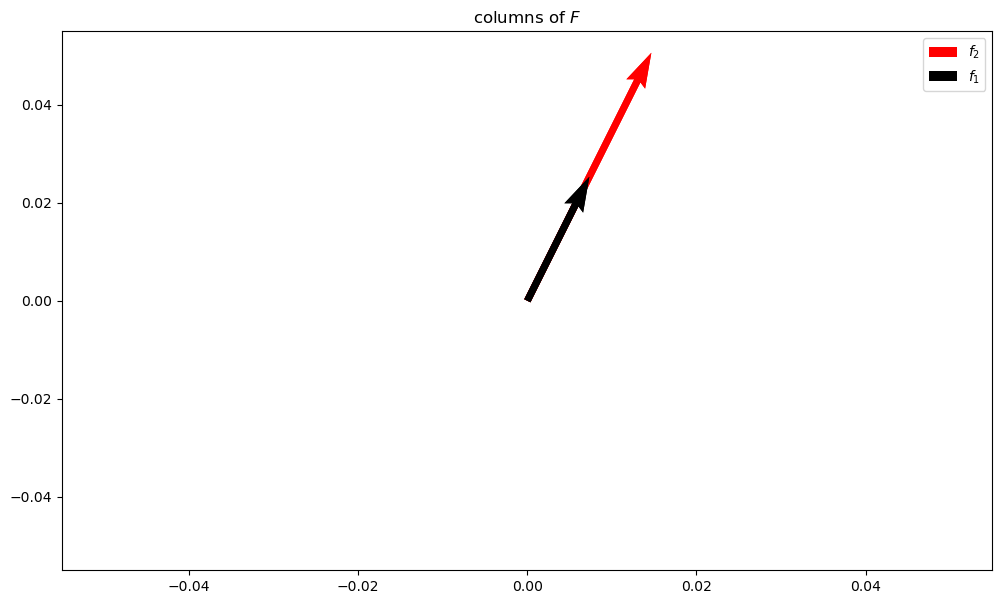

In [12]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver([0, 0],[0, 0],F[0,1], F[1,1],scale=30,label="$f_{2}$",color='red')
ax.quiver([0, 0],[0, 0],F[0,0], F[1,0],scale=30,label="$f_{1}$")
plt.title("columns of $F$ ")
plt.legend()
plt.show()

A common occurance is a matrix with more columns than rows, but in data, more rows than columns is more common. Consider the matrix $F$.


In [13]:
F=np.array([[1,2],[1,-2],[-1,1]])
Matrix(F)

⎡1   2 ⎤
⎢      ⎥
⎢1   -2⎥
⎢      ⎥
⎣-1  1 ⎦

Although, the rows of matrix $F$ are 3 dimensions, you can only describe the point lying in the 2D plane, as shown here:


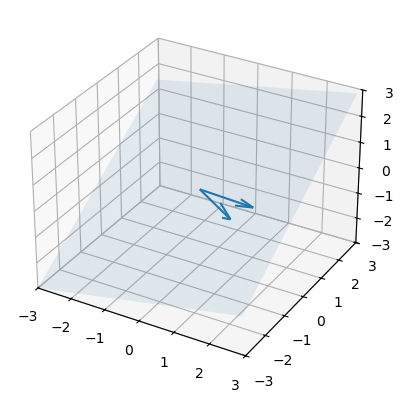

In [14]:
ax = plt.figure().add_subplot(projection='3d')
p=null_space(F.T)
xx, yy = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))
z=(p[0]*xx+p[1]*yy)/p[2]
ax.plot_surface(xx, yy, z, alpha=0.1)
ax.quiver([0,0], [0,0], [0,0], F[0,:], F[1,:], F[2,:])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
plt.show()

Therefore, the rank is 2.


In [15]:
matrix_rank(F)

2

### Frobenius Norm of a Matrix


The Frobenius norm, sometimes also called the **Euclidean norm**, is the matrix norm of an $m×n$. Matrix A is defined as the square root of the sum of the absolute squares of its elements:

$$|A| *F = \sqrt{\sum*{i=1}^m \sum\_{j=1}^n |a\_{ij}|^2}$$

Let's use the matrix A again as an example:


In [16]:
Matrix(A), norm(A)

⎛⎡2  -3⎤                   ⎞
⎜⎢     ⎥, 8.831760866327848⎟
⎝⎣4  7 ⎦                   ⎠

You could also calculate the matrix norm manually, using the formula provided above, and confirm that the results are the same.


In [17]:
m, n = A.shape[0], A.shape[1] # get number of rows and columns 
ss = 0

for i in range(m):
    for j in range(n):
        ss += A[i,j] ** 2
np.sqrt(ss)

### Matrix Addition


Consider matrix $B$:


In [18]:
B=np.array([[1,1],[1,-1]])
Matrix(B)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

In general, if we have matrix $\mathbf{A}$ and matrix $\mathbf{B}$


$\begin{align}
\mathbf{A}= \begin{bmatrix}
a\_{11} & a\_{12} & \cdots & a\_{1n} \\\\\\
a\_{21} & a\_{22} & \cdots & a\_{2n} \\\\\\
\vdots & \vdots & \ddots & \vdots \\\\\\
a\_{m1} & a\_{m2} & \cdots & a\_{mn} \\\\\\
\end{bmatrix}
\end{align}$
$\begin{align}
\mathbf{B}=\begin{bmatrix}
b\_{11} & b\_{12} & \cdots & b\_{1n} \\\\\\
b\_{21} & b\_{22} & \cdots & b\_{2n} \\\\\\
\vdots & \vdots & \ddots & \vdots \\\\\\
b\_{m1} & b\_{m2} & \cdots & b\_{mn} \\\\\\
\end{bmatrix}
\end{align}$


To be added, the two matrices must have an equal number of rows and columns, where we add the corresponding row and column element:


$\begin{align}
\mathbf{A}+\mathbf{B}=\begin{bmatrix}
a\_{11} + b\_{11} & a\_{12} + b\_{12} & \cdots & a\_{1n} + b\_{1n} \\\\\\
a\_{21} + b\_{21} & a\_{22} + b\_{22} & \cdots & a\_{2n} + b\_{2n} \\\\\\
\vdots & \vdots & \ddots & \vdots \\\\\\
a\_{m1} + b\_{m1} & a\_{m2} + b\_{m2} & \cdots & a\_{mn} + b\_{mn} \\\\\\
\end{bmatrix}
\end{align}$


In numpy, we can add two arrays as follows:


In [19]:
C=A+B
Matrix(C)

⎡3  -2⎤
⎢     ⎥
⎣5  6 ⎦

This matrix is symmetric. This means $B=B^{T}$, we can verify this in Python:


In [20]:
B_T=B.T
Matrix(B_T)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

Arbitrary semantic matrix $S=C+C^T$, where $C$ is any matrix.


In [21]:
C=np.random.randn(2,2)
S=C+C.T

In [22]:
Matrix(S)

⎡-0.990420390429474  0.136046855532569⎤
⎢                                     ⎥
⎣0.136046855532569   0.865186760549912⎦

In [23]:
Matrix(S.T)

⎡-0.990420390429474  0.136046855532569⎤
⎢                                     ⎥
⎣0.136046855532569   0.865186760549912⎦

<b>Diagonal matrix</b> is a matrix in which the entries outside of the main diagonal are all zero.


In [24]:
Matrix(np.diag(np.array([1,2,3])))

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

If the main diagonal is one, it's called a identity matrix in numpy.


In [25]:
Matrix(np.eye(3))

⎡1.0  0.0  0.0⎤
⎢             ⎥
⎢0.0  1.0  0.0⎥
⎢             ⎥
⎣0.0  0.0  1.0⎦

## Matrix and Vector Multiplication


### Dot-Product


We can define a vector as a one dimensional array of $\mathbf{a}$ and $\mathbf{b}$, and we can find the dot product of the two as follows:


$ a^T  b = \sum\_{i=1}^n a_i b_i = a\_1 b\_1 + \cdots + a_n b_n$


Where  $\mathbf{a}$ and  $\mathbf{b}$ have the same length, in numpy:


In [26]:
a=np.array([1,1])
b=np.array([1,2])

We can verify that the dimension is one.


In [27]:
a.ndim

Find the dot product


In [28]:
a@b

3

If the array is 2- dimension, the order matters. $a^{T}$ must be a row vector of shape $1xm$ and $b$ a column vector of shape $mx1$.


$a^{T} = \begin{bmatrix}
a\_{1},a\_{2},..,a\_{n}
\end{bmatrix}$

$b = \begin{bmatrix}
b\_{1} \\\\\\
b\_{2} \\\\\\
\vdots \\\\\\
b\_{n}
\end{bmatrix}$


In [29]:
a=np.array([[1],[1]])
b=np.array([[1],[2]])
a.T@b

array([[3]])

### Exercise 1

Calculate the dot product of $a$ and $one$.


In [30]:
one=np.ones(2)

# TO DO 
a.T@one

array([2.])

<details>
    <summary>Click here for Solution</summary>

```python
a.T@one
```

</details>


### The Outer product


The outer product is another useful matrix operation. Consider the matrix or vector $ \mathbf{u}$ of size $nx1$ and matrix or vector $\mathbf{v}$ $1xm$. Then their outer product is:


$
\mathbf{u} \otimes \mathbf{v} = \mathbf{u}\mathbf{v}^\textsf{T} =
\begin{bmatrix}u\_1 \\\\\ u\_2 \ \vdots\ u_n\end{bmatrix}
\begin{bmatrix}v\_1 & .. & v_m\end{bmatrix} =
\begin{bmatrix}
u\_1 v\_1 & .. & u\_1 v_m\\\\\\
u\_2 v\_1 & u\_2 v\_2 & u\_2 v\_3 \\\\\\
\vdots   & \ddots & \vdots \\\\\\
u_n v\_1 &  .. & u_n v_m
\end{bmatrix}.
$


We can perform the outer product in numpy as follows


In [31]:
u= np.array([[1],[2],[3],[4]])
v= np.array([[0],[1],[2],[3],[6]])
# TO DO
Matrix(u@v.T)

⎡0  1  2  3   6 ⎤
⎢               ⎥
⎢0  2  4  6   12⎥
⎢               ⎥
⎢0  3  6  9   18⎥
⎢               ⎥
⎣0  4  8  12  24⎦

<details>
    <summary>Click here for Solution</summary>

```python
Matrix(u@v.T)
```

</details>


### Exercise 2

Create a matrix with 4 columns where each even column is  the vector  `u`  or else it is  zero, show the rank is one:


In [32]:
u=np.array([[1],[2]])
# TO DO
Matrix(u@np.array([[0,1,0,1]]))

⎡0  1  0  1⎤
⎢          ⎥
⎣0  2  0  2⎦

<details>
    <summary>Click here for Solution</summary>

```python
Matrix(u@np.array([[0,1,0,1]]))
```

</details>


### Matrix and Vector Multiplication


We can also multiply a matrix by a vector and get a new vector. Consider the vector $\mathbf{x}$:


$
\mathbf{x}=
\begin{bmatrix}
x\_1 \\\\\\
x\_2 \\\\\\
\vdots \\\\\\
x_n
\end{bmatrix}
$


The following  $\mathbf{Ax}=\mathbf b$  matrix multiplication  is defined as the dot product  $\mathbf{x}$ with each row of $\mathbf{A}$ :


$
\begin{matrix}a\_{11}x\_1+\cdots + a\_{1n}x_n=b\_1
\\\\\ a\_{21}x\_1+\cdots + a\_{2n}x_n =b\_2
\\\\\ \vdots
\\\\\ a\_{m1}x\_1+\cdots + a\_{mn}x_n =b_m\end{matrix}
$


Where ,


$
\mathbf{b}=
\begin{bmatrix}
b\_1 \\\\\\
b\_2 \\\\\\
\vdots \\\\\\
b_m
\end{bmatrix}
$


In numpy:


In [33]:
x=np.array([1,1])

In [34]:
A=np.array([[-1,1],[1,2]])

In [35]:
b=A@x
Matrix(b)

⎡0⎤
⎢ ⎥
⎣3⎦

We can see that $b$ is a combination of the rows of $A$:

$\mathbf{b}=x\_{1}\mathbf{a}*{1}+\mathbf{x}*{2}a\_{2}$ or $\mathbf{b}$ is a rotation of  $\mathbf{x}$


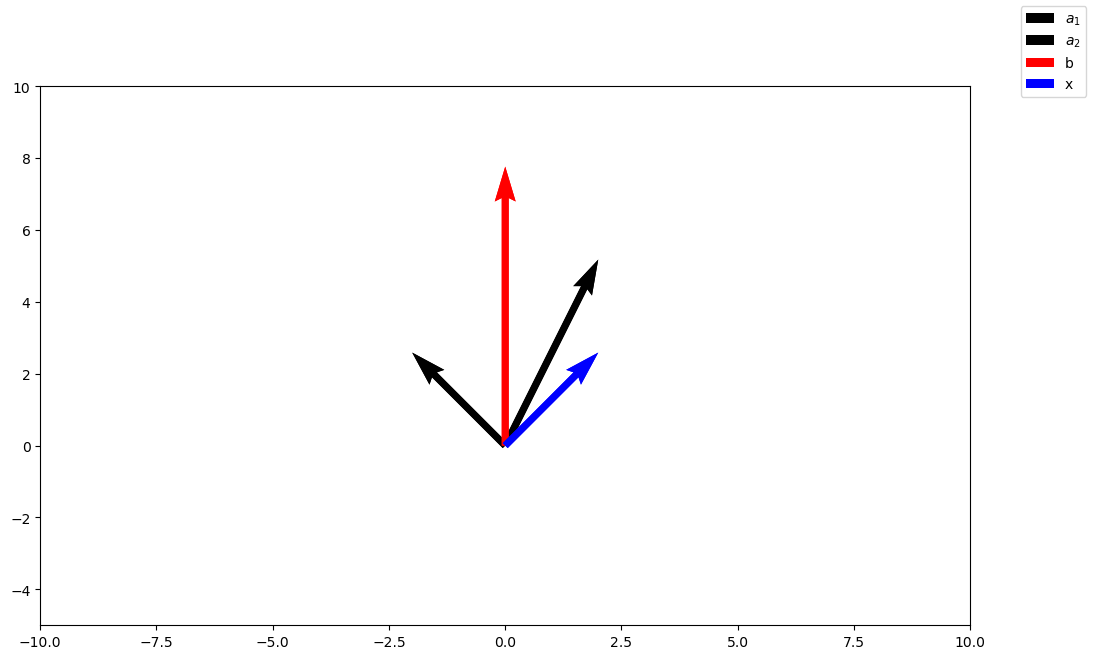

In [36]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=10,label="$a_{1}$")
ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=10,label="$a_{2}$")
ax.quiver([0,0],[0,0],b[0], b[1],scale=10,label="b",color='r')
ax.quiver([0,0],[0,0],x[0], x[1],scale=10,label="x",color='b')
ax.set_xlim([-10,10])
ax.set_ylim([-5,10])
fig.legend()
plt.show()

### Multiplying Matrices


If a matrix $\mathbf{C}$ is the product of matrix $\mathbf{A}$ and matrix $\mathbf{B}$, then the $i-th$ row $j-th$ column is obtained by multiplying term-by-term the entries of the $i-th$ row of $\mathbf{A}$ and the $j-th$ column of $\mathbf{B}$, and summing these $n$ products. In other words, you can also think of the  $i-th$ row $j-th$ column as the dot product of the $i-th$ row of $\mathbf{A}$  and the $j-th$ column of $\mathbf{B}$:


$\mathbf{C}=\mathbf{AB}$

$=\begin{pmatrix}
a\_{11}b\_{11} +\cdots + a\_{1n}b\_{n1} & a\_{11}b\_{12} +\cdots + a\_{1n}b\_{n2} & \cdots & a\_{11}b\_{1p} +\cdots + a\_{1n}b\_{np} \\\\\\
a\_{21}b\_{11} +\cdots + a\_{2n}b\_{n1} & a\_{21}b\_{12} +\cdots + a\_{2n}b\_{n2} & \cdots & a\_{21}b\_{1p} +\cdots + a\_{2n}b\_{np} \\\\\\
\vdots & \vdots & \ddots & \vdots \\\\\\
a\_{m1}b\_{11} +\cdots + a\_{mn}b\_{n1} & a\_{m1}b\_{12} +\cdots + a\_{mn}b\_{n2} & \cdots & a\_{m1}b\_{1p} +\cdots + a\_{mn}b\_{np} \\\\\\
\end{pmatrix} $


In [37]:
C=A@B
Matrix(C)

⎡0  -2⎤
⎢     ⎥
⎣3  -1⎦

You can repeat the process for more matrices, if the matrix is full rank, we can invert it: $\mathbf{A}^{-1}$


In [38]:
A_inv=inv(A)
Matrix(A_inv)

⎡-0.666666666666667  0.333333333333333⎤
⎢                                     ⎥
⎣0.333333333333333   0.333333333333333⎦

This can be a complex computation. If we multiply a matrix with its inverse, we get the Identity matrix $\mathbf{AA}^{-1}=I$.


In [39]:
I=A_inv@A
Matrix(I)

⎡1.0  -1.11022302462516e-16⎤
⎢                          ⎥
⎣0.0           1.0         ⎦

If we multiply any square matrix with an Identity matrix, we get the original Matrix, for example $IA=A$ in numpy:


In [40]:
A@I

array([[-1.,  1.],
       [ 1.,  2.]])

### Exercise 3

Use the inverse of  matrix $\mathbf{A}$ to solve for $\mathbf{x}$ given $\mathbf{b}$ and assign it to `x_` compare the result to `x`


In [41]:
# TO DO
x_=A_inv@b
print("x_ :",x_)
print("x:",x)

x_ : [1. 1.]
x: [1 1]


<details>
    <summary>Click here for Solution</summary>

```python
x_=A_inv@b
print("x_ :",x_)
print("x:",x)
```

</details>


Another type of matrixes is the **orthogonal matrix**. An <b>orthogonal matrix</b> is extremely useful: if matrix $Q$ is orthogonal, such as $Q^T=Q^{-1}$, the rows and columns are orthogonal also. For example:


In [42]:
Q=np.array([[1,1],[1,-1]])*2**(-1/2)
Q

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

We can verify that $Q^T=Q^{-1}$:


In [43]:
I=Q@Q.T
Matrix(I)

⎡        1.0           4.26642158858964e-17⎤
⎢                                          ⎥
⎣4.26642158858964e-17          1.0         ⎦

For an <b>orthogonal matrix</b>, the columns are orthogonal:


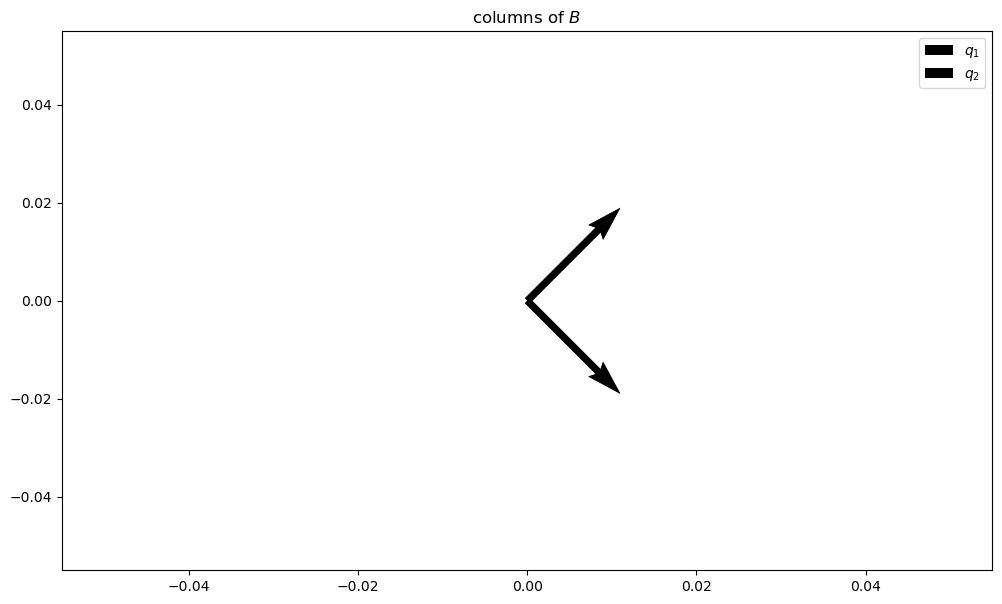

In [44]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver([0, 0],[0, 0],B[0,0], B[1,0],scale=10,label="$q_{1}$")
ax.quiver([0, 0],[0, 0],B[0,1], B[1,1],scale=10,label="$q_{2}$")
plt.title("columns of $B$ ")
plt.legend()
plt.show()

We usually place our data in a design matrix $X$, which is a matrix where each row represents an individual sample. Consider the following example `X_`


In [45]:
samples=200

u=np.array([[1.0,1.0],[0.10,-0.10]])/(2)**(0.5)

X_=np.dot(4*np.random.randn(samples,2),u)+10
X_[0:5]

array([[11.35667241, 11.10494397],
       [11.13671704, 11.73196826],
       [13.93177417, 14.38200834],
       [ 8.5708278 ,  8.31931882],
       [ 8.47292602,  8.71448833]])

We can plot the samples:


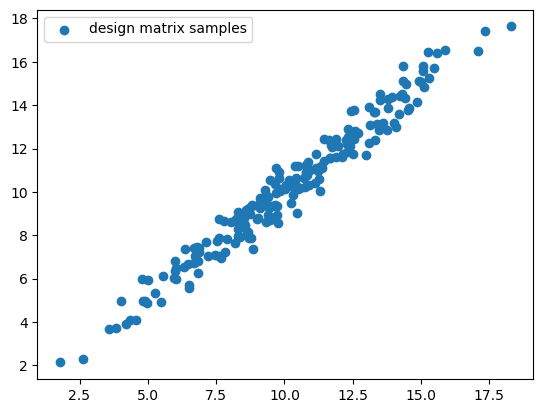

In [46]:
dict_={"design matrix samples":X_}
plot_2d(dict_)

We can find the shape of the design matrix:


In [47]:
N,D=X_.shape
print("number of smaples {}, dimensions is {}".format(N,D))

number of smaples 200, dimensions is 2


We can also perform lots of operations with Matrix multiplication, for example we can calculate the mean with the following:


In [48]:
mean=(np.ones((1,N))/N)@X_
mean

array([[10.12962537, 10.17673831]])

We can verify the result in numpy.


In [49]:
X_.mean(axis=0)

array([10.12962537, 10.17673831])

### Exercise 4

Perform matrix multiplication using **no_mean** and **X\_**, save the result in **X**. Show the mean of **X** with respect to the rows is approximately zero:


In [50]:
I=np.identity(N)
col1=np.ones((1,N))
row1=np.ones((N,1))/N
no_mean=(I-row1@col1)


In [51]:
# TO DO
X=no_mean@X_
print("mean of X",X.mean(axis=0))

mean of X [ 7.14983628e-16 -8.83737528e-16]


<details>
    <summary>Click here for Solution</summary>

```python
X=no_mean@X_
print("mean of X",X.mean(axis=0))
```

</details>


[[10.12962537 10.17673831]]


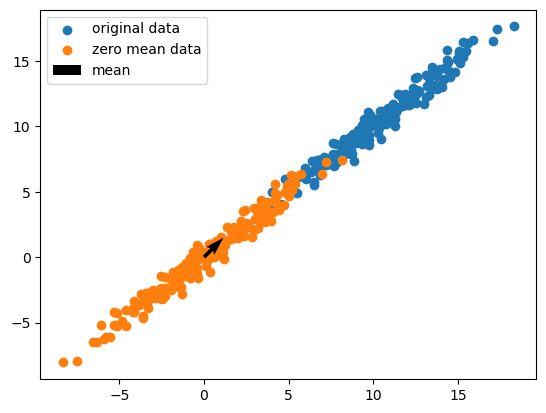

In [52]:
dict_={"original data":X_,"zero mean data":X,"mean":mean}
plot_2d(dict_)    

As we subtracted the mean, we can calculate the empirical covariance matrix using matrix multiplication.


$C=\frac{1}{N}   \mathbf{X}^T \mathbf{X} $


In [53]:
C=X.T@X/N
Matrix(C)

⎡9.51721437509029  9.41248824274094⎤
⎢                                  ⎥
⎣9.41248824274094  9.65227083948936⎦

We can see the matrix is full rank:


In [54]:
matrix_rank(C)

2

## Eigen Decomposition


### Eigenvectors and Eigenvalues


If the Matrix is full rank we can apply Eigen factorization or Eigen decomposition to it, so that it is represented in terms of its eigenvalues $\mathbf{\Lambda}$ and eigenvectors embedded in $\mathbf{Q}$, symbolically:


$\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$


We can obtain the Matrices as follows:


In [55]:
eigen_values , eigen_vectors = eig(A)

`eigen_values` is a vector so we convert it to a diagonal matrix  using the `np.diag` function


In [56]:
Matrix(np.diag(eigen_values))

⎡-1.30277563773199        0.0       ⎤
⎢                                   ⎥
⎣       0.0         2.30277563773199⎦

We can retrieve the original matrix as follows:


In [57]:
A=eigen_vectors@np.diag(eigen_values)@inv(eigen_vectors)
Matrix(A)

⎡-1.0  1.0⎤
⎢         ⎥
⎣1.0   2.0⎦

## Factorization for PCA


We can only use  eigen decomposition if the matrix is full rank, but even if the matrix is full rank, the eigenvalues and eigenvectors could be complex.

A useful application of the symmetric matrix ($S=S^{T}$) is where we want the eigenvalues to be real and the eigenvectors to be orthogonal. For example, the covariance matrix $C$ in PCA.


$\mathbf{C}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^{T}$


Using numpy,


In [58]:
eigen_values , eigen_vectors = eig(C)

We can perform PCA using factorization. To find the first principle component, we need to find the eigenvector with the largest eigenvalue.


In [59]:
v=eigen_vectors[:, np.argmax(eigen_values)].reshape(-1,1)
v

array([[-0.70456577],
       [-0.70963869]])

We can calculate first principal component by finding the projection of the original data onto $\mathbf{v}$.


$\mathbf{Z}=\mathbf{X} \mathbf{v}$


In [60]:
Z=X@v

### Exercise 5

Perform PCA with `n_components=1` on **X**. Store the transformed data in **X_transformed**. Also do an inverse_transform using the same fitted PCA object, store the result in **X\_**.


In [61]:
#TODO
pca = PCA(n_components=1)
X_transformed=pca.fit_transform(X)
X_=pca.inverse_transform(X_transformed)

<details>
    <summary>Click here for Solution</summary>

```python
pca = PCA(n_components=1)
X_transformed=pca.fit_transform(X)
X_=pca.inverse_transform(X_transformed)

```

</details>


We can also  transform the data back to its original space, using matrix multiplication:


$\hat{X}=\mathbf{Z} \mathbf{v}^T$


### Exercise 6

Find the transform data back to its original space from the above equation, call it **Xhat**.


In [62]:
#TODO
Xhat=Z@v.T

<details>
    <summary>Click here for Solution</summary>

```python
Xhat=Z@v.T
```

</details>


You can also check that the two methods give the same "inverse transform" result (**X\_** and **Xhat** will overlap in the plot) by running the following cell.


[[-0.70456577 -0.70963869]]


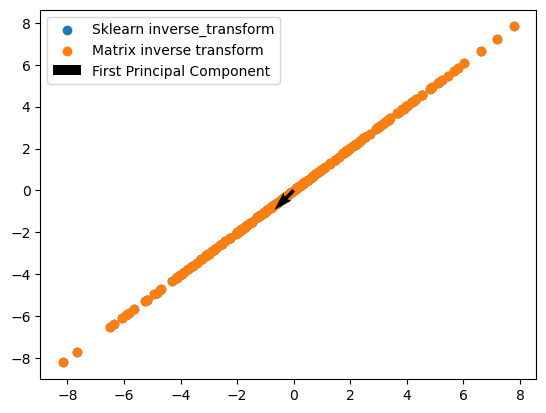

In [63]:
dict_ = {"Sklearn inverse_transform": X_, "Matrix inverse transform": Xhat, "First Principal Component": v.T}
plot_2d(dict_)

# Congratulations! - You have completed the lab


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a> Joseph has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description  |
| ----------------- | ------- | ----------- | ------------------- |
| 2022-03-25        | 0.1     | Joseph S.   | Updated all content |
| 2022-05-26        | 0.1     | Roxanne Li  | Review and edit     |
| 2022-06-09        | 0.1     | Steve H.    | QA pass             |
| 2022-07-15        | 0.1     | Svitlana K. | Review and edit     |


Copyright © 2021 IBM Corporation. All rights reserved.
